# Team-G4-ExcelR-P53

# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
loan = pd.read_csv("train.csv")

# Exploratory Data Analysis-(EDA)

steps involved to understand, clean and prepare our data for building model <br />
1. variable identification <br />
2. univariate analysis <br />
3. bi-variate analysis <br />
4. missing values treatment <br />
5. outliers treatment <br />
6. variable transformation <br />
7. variable creation <br />
Finally we iterate steps 4-7 till we get good model.

## Variable Identification

In [3]:
# look the data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#check no. of rows and columns
loan.shape

(614, 13)

**Inference:** <br />
      There are 614 records and 13 features.

In [5]:
loan.info()  #There are some missing values in  data,we will handle as go along.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Count distinct observations without NaN values.
loan.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Loan_Status            2
Credit_History         2
Self_Employed          2
Education              2
Married                2
Gender                 2
dtype: int64

**Inference:** <br />
Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables.

In [7]:
# change the data type of Credit_History column
loan['Credit_History'] = loan['Credit_History'].astype('O')

In [8]:
#Let's look at the number of columns of each data type. int64 and float64 are numeric variables 
# (which can be either discrete or continuous). object columns contain strings and are categorical features.
loan.dtypes.value_counts()

object     9
float64    3
int64      1
dtype: int64

In [9]:
# unique classes in each object columns
object_var=loan.select_dtypes('object').columns
object_var=object_var[1:]
unique_values=[]
for i in range(0,8):
    unique_values.append(loan[object_var[i]].unique())
object_var_table=pd.DataFrame({"Object_variable":object_var,"Unique_Values":unique_values})
object_var_table

,Object_variable,Unique_Values
0,Gender,"[Male, Female, nan]"
1,Married,"[No, Yes, nan]"
2,Dependents,"[0, 1, 2, 3+, nan]"
3,Education,"[Graduate, Not Graduate]"
4,Self_Employed,"[No, Yes, nan]"
5,Credit_History,"[1.0, 0.0, nan]"
6,Property_Area,"[Urban, Rural, Semiurban]"
7,Loan_Status,"[Y, N]"


In [10]:
#describe the numeric columns
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [11]:
# describe the chategoric columns
loan.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002778,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


# Data visualization

## Univariate Analysis

#### Categorical Variables:

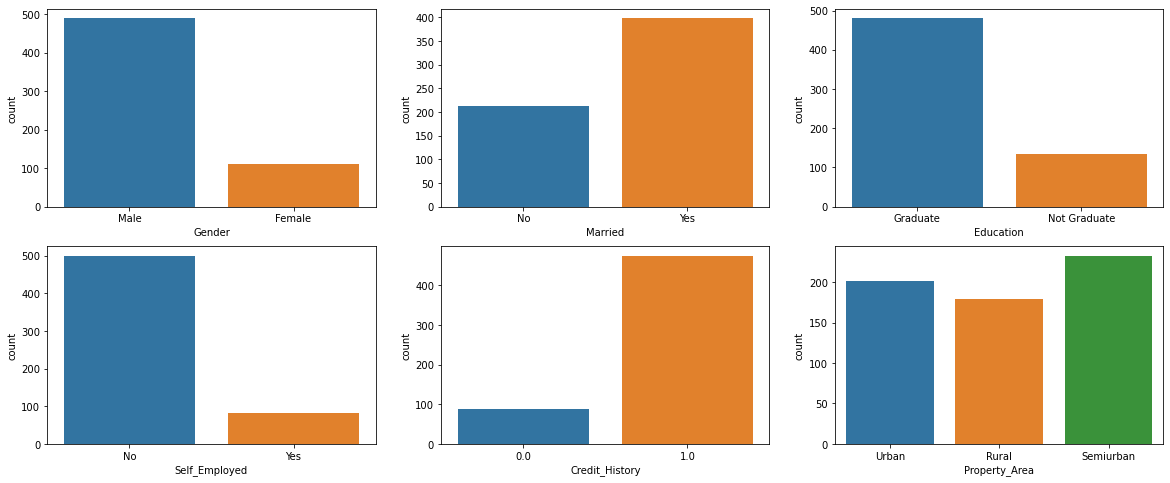

In [12]:
#Univariate Analysis
plt.figure(figsize=(20,8))
plt.subplot(231);sns.countplot('Gender',data=loan);        plt.subplot(232);sns.countplot('Married',data=loan)
plt.subplot(233);sns.countplot('Education',data=loan);     plt.subplot(234);sns.countplot('Self_Employed',data=loan)
plt.subplot(235);sns.countplot('Credit_History',data=loan);plt.subplot(236);sns.countplot('Property_Area',data=loan);plt.show()

**Inference:** <br />
Mostly, those who **Male**, **Married**, **Graduated**, **Not Self_Employed** they applied for Loan.<br />
Those who a high **Credit_History** (1.0) they mostly applied for Loan.<br />
From any **Property_Area** people applied for Loan.

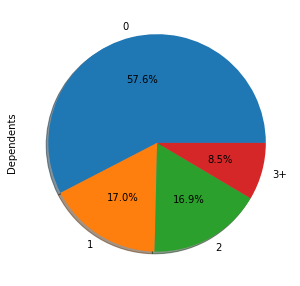

In [13]:
plt.figure(figsize=(10,5))
loan['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True);plt.show()

**Inference:** <br />
Mostly those who have **NO dependents** they applied for Loan

Y    422
N    192
Name: Loan_Status, dtype: int64


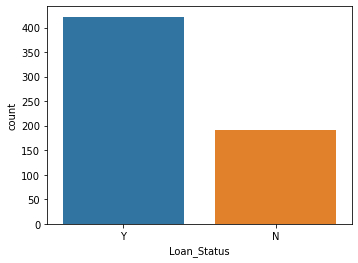

In [14]:
# Targate Vaariable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(loan['Loan_Status'])#check our data is balanced or not
print(loan['Loan_Status'].value_counts())

**Inference:** <br />
From above, data is imbalanced we need to balance it.

### Continuous Variables:

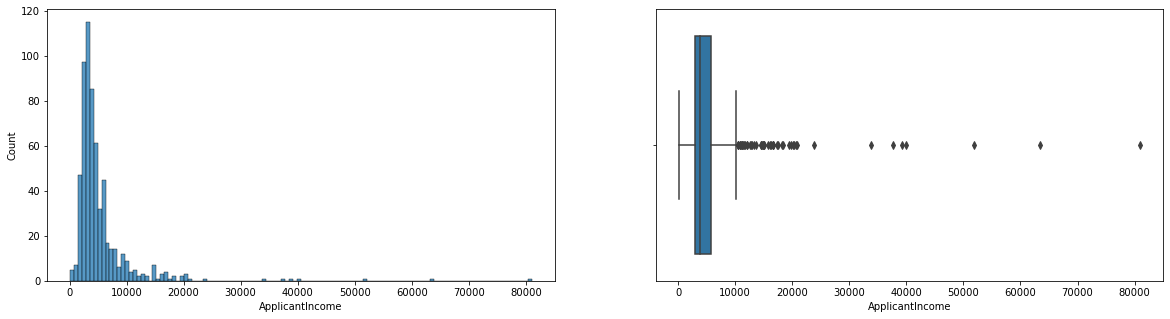

In [15]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['ApplicantIncome']);plt.subplot(122);sns.boxplot(loan['ApplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in ApplicantIncome.

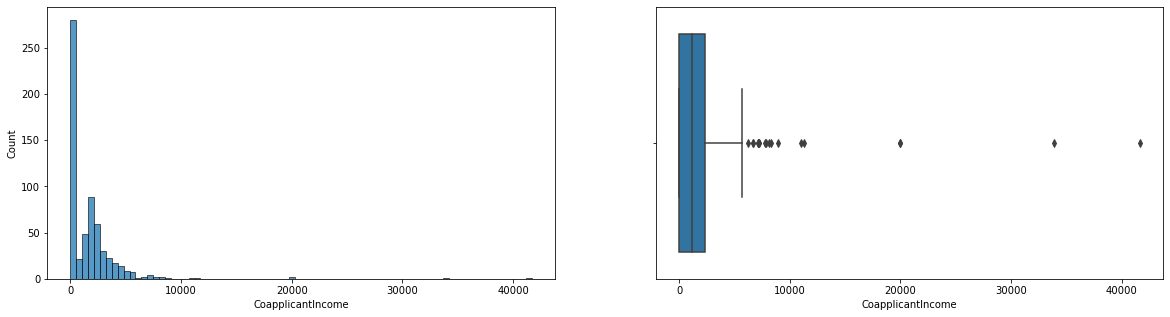

In [16]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['CoapplicantIncome']);plt.subplot(122);sns.boxplot(loan['CoapplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and There are *Outliers* in CoapplicantIncome.

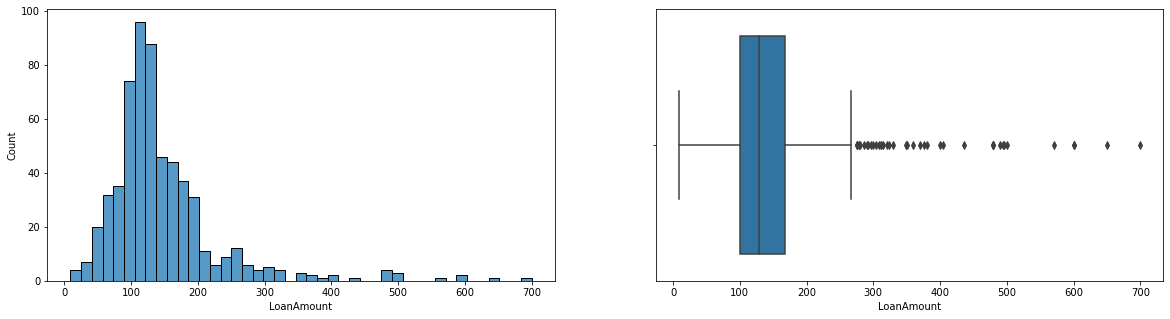

In [17]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['LoanAmount']);plt.subplot(122);sns.boxplot(loan['LoanAmount'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in LoanAmount.

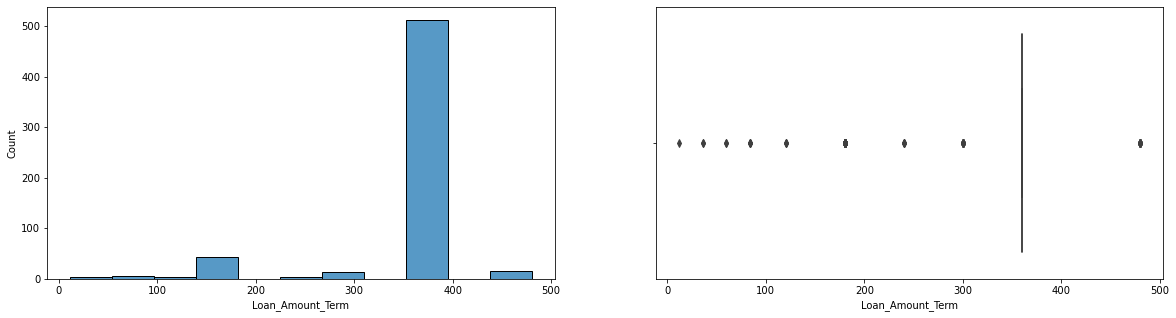

In [18]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['Loan_Amount_Term']);plt.subplot(122);sns.boxplot(loan['Loan_Amount_Term'])
plt.show()

**Inference:** <br />
Most **Loan_Amount_Term** is 360 only.

## Bi-variate Analysis

In [19]:
loan.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y


In [20]:
# First we split numeric and chategoric columns seperately
cat_data = []
num_data = []
for col,types in enumerate(loan.dtypes):
    if types=='object':
        cat_data.append(loan.iloc[:,col])
    else:
        num_data.append(loan.iloc[:,col])

cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

### Continuous & Continuous :

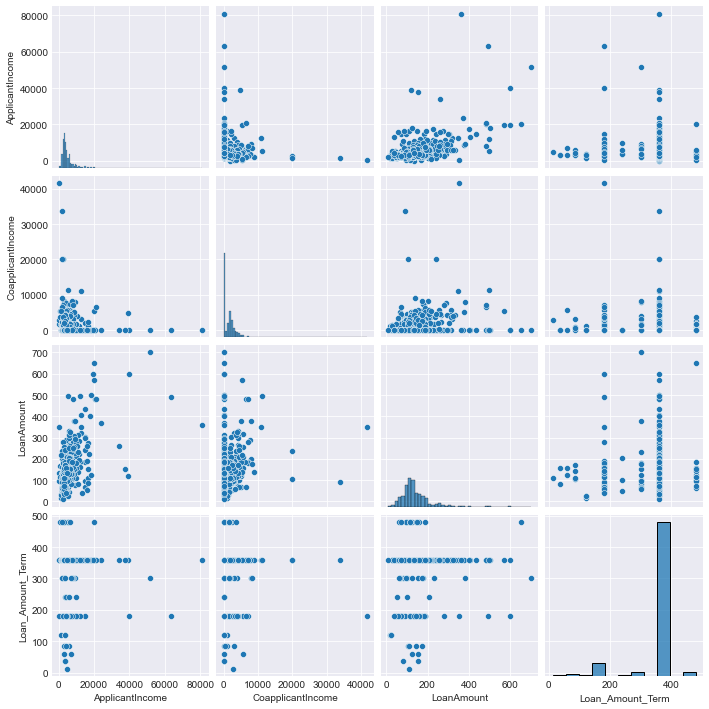

In [21]:
plt.style.use('seaborn-darkgrid')
sns.pairplot(num_data);plt.show();

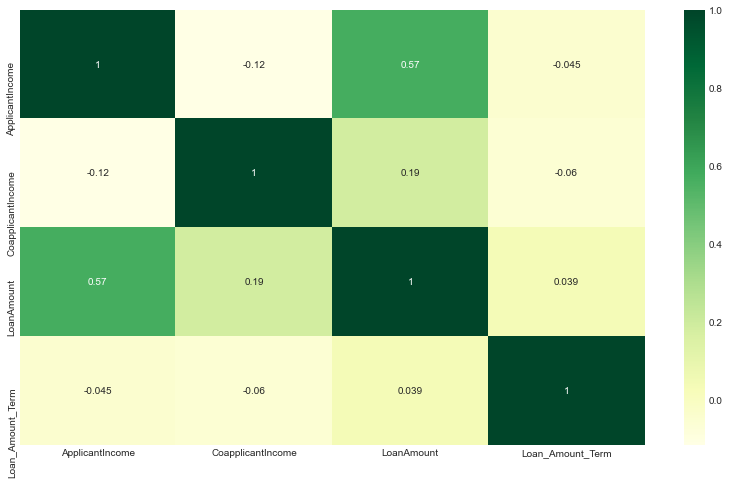

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(loan.corr(), annot = True, cmap="YlGn");plt.show()

### Categorical & Categorical :

#### Two-way table

In [23]:
Education_tab=pd.crosstab(loan.Education,loan.Gender)
Education_tab  # we can see how many males and females are graduated or not.

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


In [24]:
dependence_tab=pd.crosstab(loan.Dependents,loan.Self_Employed)
dependence_tab   # we can see those who NOT Self_Employed and NOT dependent mostly they apply for loan

Self_Employed,No,Yes
Dependents,,
0,289,37
1,76,20
2,80,16
3+,42,7


####  Pie Chart : (with target variable)

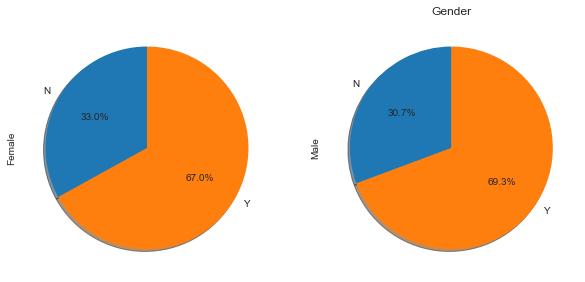

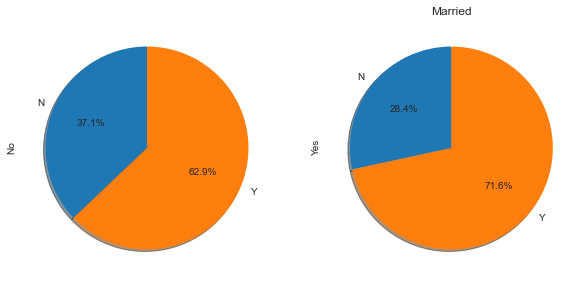

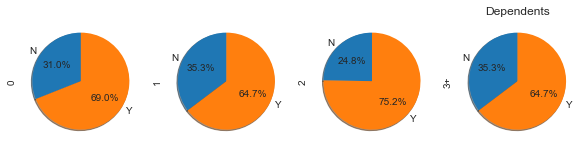

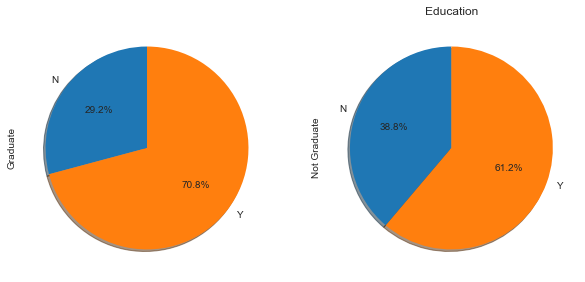

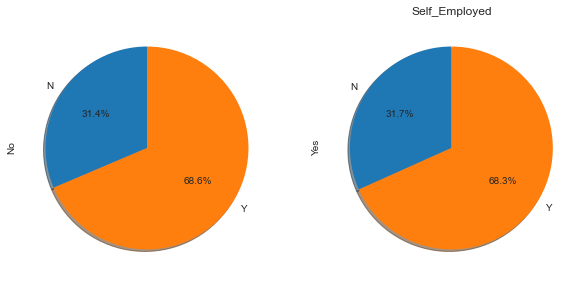

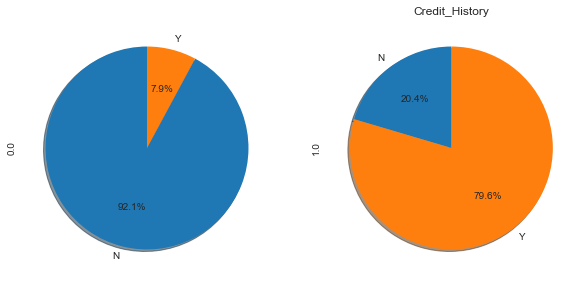

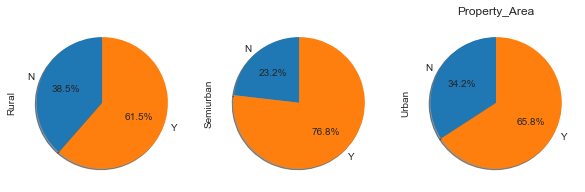

In [25]:
for i in object_var:
    if i!="Loan_Status":
        loan.groupby(["Loan_Status",i]).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(10, 8),startangle=90,shadow=True,autopct='%1.1f%%',legend=False)
        plt.title(i)

**Inference:** <br />
The People who have  good Credit History they got loan  most of the Time and other variables plays less importance role.

#### Chi-Square Test:

In [26]:
from scipy.stats import chi2_contingency
First_var=[]
Sec_var=[]
p_value=[]
Interpretation=[]
chi_square=[]
for i in cat_data.columns:
    crossT=pd.crosstab(cat_data[i],cat_data['Loan_Status'])
    p=chi2_contingency(crossT)[1]
    c=chi2_contingency(crossT)[0]
    First_var.append(i)
    Sec_var.append("Loan_Status")
    p_value.append(p)
    chi_square.append(c)
    if p<=0.05:
        Interpretation.append("The two categorical variables are dependent")
    else:
        Interpretation.append("The two categorical variables are independent")
description=pd.DataFrame({"Features":cat_data.columns,"Target variable":Sec_var,"chi2_score":chi_square,"p_value":p_value,"Interpretation":Interpretation})
description

,Features,Target variable,chi2_score,p_value,Interpretation
0,Loan_ID,Loan_Status,614.000000,4.810243e-01,The two categorical variables are independent
1,Gender,Loan_Status,0.139626,7.086530e-01,The two categorical variables are independent
2,Married,Loan_Status,4.475019,3.439381e-02,The two categorical variables are dependent
3,Dependents,Loan_Status,3.158340,3.678507e-01,The two categorical variables are independent
4,Education,Loan_Status,4.091490,4.309962e-02,The two categorical variables are dependent
5,Self_Employed,Loan_Status,0.005293,9.420039e-01,The two categorical variables are independent
6,Credit_History,Loan_Status,174.637297,7.184760e-40,The two categorical variables are dependent
7,Property_Area,Loan_Status,12.297623,2.136019e-03,The two categorical variables are dependent
8,Loan_Status,Loan_Status,609.355922,1.544676e-134,The two categorical variables are dependent


### Categorical & Continuous :

In [27]:
import ppscore as pps
pps.predictors(loan,"Loan_Status") #We can calculate the PPS of all the predictors in the dataframe against a target y

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Credit_History,Loan_Status,0.492600,classification,True,weighted F1,0.592199,0.793081,DecisionTreeClassifier()
1,LoanAmount,Loan_Status,0.055993,classification,True,weighted F1,0.570946,0.594970,DecisionTreeClassifier()
2,Loan_Amount_Term,Loan_Status,0.039016,classification,True,weighted F1,0.573333,0.589980,DecisionTreeClassifier()
3,CoapplicantIncome,Loan_Status,0.036726,classification,True,weighted F1,0.563518,0.579548,DecisionTreeClassifier()
4,ApplicantIncome,Loan_Status,0.004756,classification,True,weighted F1,0.563518,0.565594,DecisionTreeClassifier()
5,Loan_ID,Loan_Status,0.000000,feature_is_id,True,None,0.000000,0.000000,None
6,Gender,Loan_Status,0.000000,classification,True,weighted F1,0.577371,0.561944,DecisionTreeClassifier()
7,Married,Loan_Status,0.000000,classification,True,weighted F1,0.557930,0.557927,DecisionTreeClassifier()
8,Dependents,Loan_Status,0.000000,classification,True,weighted F1,0.569282,0.562767,DecisionTreeClassifier()
9,Education,Loan_Status,0.000000,classification,True,weighted F1,0.563518,0.559917,DecisionTreeClassifier()


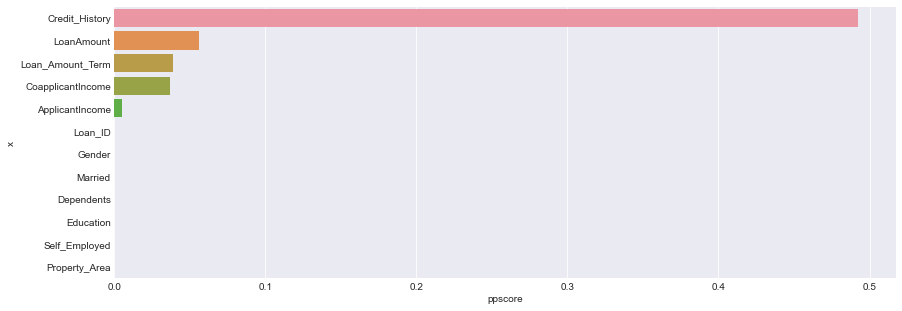

In [28]:
#Visualization of the results
plt.figure(figsize=(14,5))
predictors_df = pps.predictors(loan, y="Loan_Status")
sns.barplot(data=predictors_df, x="ppscore", y="x");plt.show()

## Missing Value Treatment

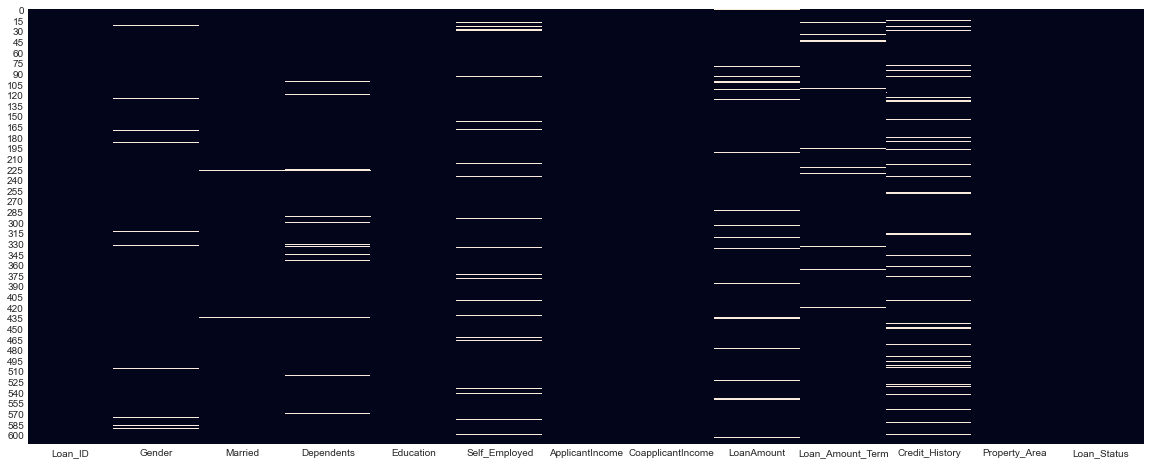

In [29]:
# visualize using Heat map
plt.figure(figsize=(20,8))
sns.heatmap(loan.isnull(), cbar=False);plt.show()

In [30]:
#Checking the null Values in Data
loan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [31]:
#Function to calculate missing values by column function
def miss_value_table(df):
    miss_value=df.isnull().sum()
    percent_miss_value=(miss_value/len(df))*100
    miss_value_table=pd.concat([miss_value, percent_miss_value],axis=1)
    miss_value_table_columns=miss_value_table.rename({0:'Missing Values',1 : '% of Total Values'},axis=1)
    miss_value_table_columns=miss_value_table_columns[miss_value_table_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    return miss_value_table_columns    
missing_values=miss_value_table(loan)
missing_values

,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


**Inference:** <br />
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). 

In [32]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,Y


In [33]:
#missing value imputation for categorical variable using mode
cat_data.fillna(cat_data.mode().iloc[0], inplace=True)
cat_data.isnull().sum().any() # no more missing data 

False

In [34]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [35]:
#missing value imputation for numeric variable using backfill (use next valid observation to fill gap)
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() #no more missing data

False

In [36]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome on train data
num_data['TotalIncome'] = num_data['ApplicantIncome'] + num_data['CoapplicantIncome']

In [37]:
num_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [38]:
num_data.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,128.0,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0


In [39]:
# Transform the Target column
target_values = {'Y':1,'N':0}
target = cat_data['Loan_Status']
y = target.map(target_values)

In [40]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [41]:
cat_data.drop(columns={'Loan_Status','Loan_ID'}, axis=1, inplace=True)

In [42]:
cat_data['Gender'].replace({'Male':1,'Female':0},inplace=True)
cat_data['Married'].replace({'Yes':1,'No':0},inplace=True)
cat_data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
cat_data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [43]:
cat_data['Credit_History'] = cat_data['Credit_History'].astype('int64')

In [44]:
# transform other columns
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,1,0,0,1,0,0
2,1,1,1,1,1,1,0,0,0,0,0,1
3,1,1,0,0,1,1,0,0,0,0,0,1
4,1,0,1,0,1,1,0,0,0,0,0,1


## variable transformation

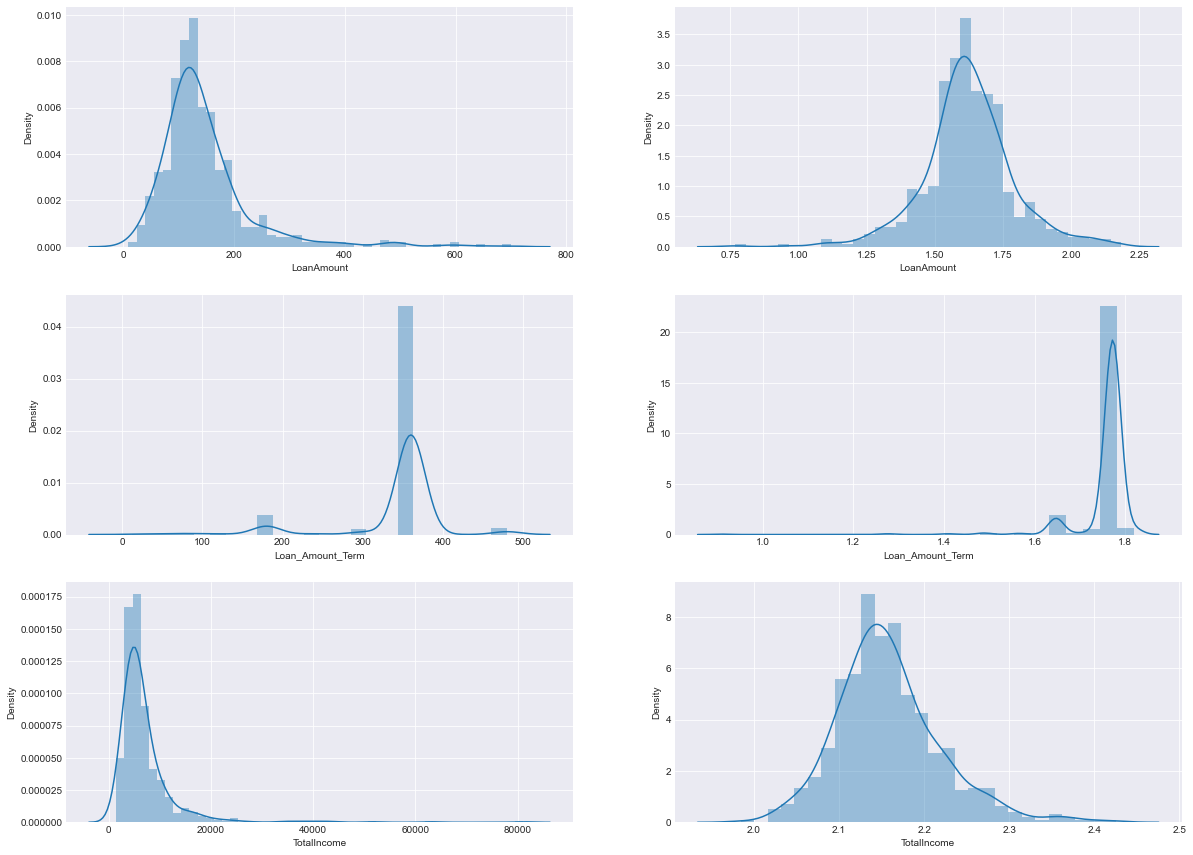

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(321);sns.distplot(num_data['LoanAmount']);      plt.subplot(322);sns.distplot(np.log(np.cbrt(num_data["LoanAmount"]+1)))
plt.subplot(323);sns.distplot(num_data['Loan_Amount_Term']);plt.subplot(324);sns.distplot(np.log(np.log(num_data['Loan_Amount_Term'])))
plt.subplot(325);sns.distplot(num_data['TotalIncome']);     plt.subplot(326);sns.distplot(np.log(np.log(num_data["TotalIncome"]+1)));plt.show()

In [46]:
num_data_trans = pd.DataFrame()   
num_data_trans['LoanAmount'] =np.log(np.cbrt(num_data["LoanAmount"]+1))
num_data_trans['Loan_Amount_Term']=np.log(np.log(num_data['Loan_Amount_Term']))
num_data_trans['TotalIncome'] =np.log(np.log(num_data["TotalIncome"]+1))

In [47]:
num_data_trans.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,1.619937,1.772594,2.160353
1,1.619937,1.772594,2.165015
2,1.401564,1.772594,2.080279
3,1.598597,1.772594,2.140716
4,1.651942,1.772594,2.163286


### Normalizaiton of data

In [48]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
num_scale = pd.DataFrame(scale.fit_transform(num_data_trans),columns=num_data_trans.columns)

In [49]:
num_scale.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,0.601711,0.947567,0.399387
1,0.601711,0.947567,0.409968
2,0.447563,0.947567,0.217659
3,0.586647,0.947567,0.354821
4,0.624304,0.947567,0.406045


In [50]:
final_loan = pd.concat([cat_data, num_scale, y], axis=1)

In [51]:
final_loan.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Status
0,1,0,1,0,1,1,0,0,0,0,0,1,0.601711,0.947567,0.399387,1
1,1,1,1,0,1,0,1,0,0,1,0,0,0.601711,0.947567,0.409968,0
2,1,1,1,1,1,1,0,0,0,0,0,1,0.447563,0.947567,0.217659,1
3,1,1,0,0,1,1,0,0,0,0,0,1,0.586647,0.947567,0.354821,1
4,1,0,1,0,1,1,0,0,0,0,0,1,0.624304,0.947567,0.406045,1


In [52]:
final_loan.shape

(614, 16)

In [53]:
# spliting data 
X = final_loan.iloc[:,:-1]
Y = final_loan.iloc[:,-1]

In [54]:
X.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,1,0,1,0,1,1,0,0,0,0,0,1,0.601711,0.947567,0.399387
1,1,1,1,0,1,0,1,0,0,1,0,0,0.601711,0.947567,0.409968
2,1,1,1,1,1,1,0,0,0,0,0,1,0.447563,0.947567,0.217659
3,1,1,0,0,1,1,0,0,0,0,0,1,0.586647,0.947567,0.354821
4,1,0,1,0,1,1,0,0,0,0,0,1,0.624304,0.947567,0.406045


In [55]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Balancing the data

In [56]:
from collections import Counter
#from imblearn.over_sampling import RandomOverSampler 
from imblearn.combine import SMOTETomek

for more [information](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [122]:
print('Original data set shape %s' % Counter(Y))
imb = SMOTETomek(sampling_strategy='minority',random_state=1)
X_res,Y_res = imb.fit_resample(X,Y)
print('Resample data set shape %s' % Counter(Y_res))

Original data set shape Counter({1: 422, 0: 192})
Resample data set shape Counter({1: 383, 0: 383})


1    383
0    383
Name: Loan_Status, dtype: int64


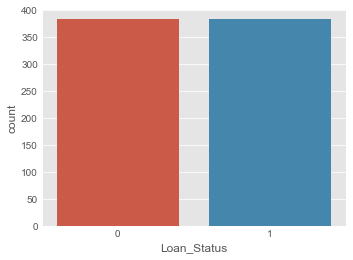

In [125]:
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(Y_res)#check our data is balanced or not
print(Y_res.value_counts())

### Feature Engineering(Univariate Feature Selection)

In [58]:
from sklearn.feature_selection import chi2
a = chi2(X,Y) # it gives chi2 value and p_values
pd.DataFrame({"Features":X.columns,"Target variable":"Loan_Status","chi2_score":a[0],"p_value":a[1]}).sort_values(by='p_value')

,Features,Target variable,chi2_score,p_value
4,Credit_History,Loan_Status,26.005877,3.403796e-07
10,Property_Area_Semiurban,Loan_Status,7.103093,7.695104e-03
9,Property_Area_Rural,Loan_Status,4.410584,3.571661e-02
7,Dependents_2,Loan_Status,1.996446,1.576685e-01
1,Married,Loan_Status,1.782425,1.818518e-01
2,Education,Loan_Status,0.988390,3.201361e-01
11,Property_Area_Urban,Loan_Status,0.783946,3.759370e-01
6,Dependents_1,Loan_Status,0.768400,3.807125e-01
8,Dependents_3+,Loan_Status,0.384200,5.353641e-01
0,Gender,Loan_Status,0.036234,8.490324e-01


# Model Building

In [59]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score, cross_validate,GridSearchCV

#### Spliting Data

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.18,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((628, 15), (138, 15), (628,), (138,))

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# Using Grid Search CV for Tunning Parameters
clf = LogisticRegression() 
param_grid = [{'max_iter':[5,10,20,30,50,],'C':[0.01,0.1,0.2,0.3,0.4,0.6] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ , gsv.best_score_ 

({'C': 0.01, 'max_iter': 5}, 0.7466973886328725)

In [63]:
model_LR=LogisticRegression(C=0.09,max_iter=5)
model_LR.fit(X_train, y_train)
model_LR.score(X_test,y_test)

0.7608695652173914

In [64]:
from sklearn.metrics import confusion_matrix
y_pred=model_LR.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[37 26]
 [ 7 68]]
              precision    recall  f1-score   support

           0       0.84      0.59      0.69        63
           1       0.72      0.91      0.80        75

    accuracy                           0.76       138
   macro avg       0.78      0.75      0.75       138
weighted avg       0.78      0.76      0.75       138



In [65]:
# Model Validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [66]:
kfold = KFold(shuffle=True, n_splits=6,random_state=7)
results = cross_validate(estimator=model_LR,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.025684
score_time         0.023644
test_accuracy      0.758346
train_accuracy     0.752997
test_precision     0.693437
train_precision    0.691341
test_recall        0.925707
train_recall       0.913524
test_f1_score      0.790969
train_f1_score     0.787007
dtype: float64

###  Feature Engineering(RFE) For LR

In [67]:
from sklearn.feature_selection import RFE
model_rfe=LogisticRegression(max_iter=5)   # max_iter=100 by default
rfe=RFE(model_rfe)  #n_features_to_select=4
fit=rfe.fit(X,Y)
print(fit.support_)
print(fit.ranking_)

[False  True False False  True False  True False False  True False  True
  True  True False]
[8 1 2 9 1 3 1 7 4 1 5 1 1 1 6]


In [68]:
X_res.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'LoanAmount', 'Loan_Amount_Term', 'TotalIncome'],
      dtype='object')

In [69]:
X_RFE = X_res.drop(columns={'Gender','Self_Employed','Dependents_2'},axis=1)
X_RFE

,Married,Education,Credit_History,Dependents_0,Dependents_1,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,0,1,1,1,0,0,0,0,1,0.601711,0.947567,0.399387
1,1,1,1,0,1,0,1,0,0,0.601711,0.947567,0.409968
2,1,1,1,1,0,0,0,0,1,0.447563,0.947567,0.217659
3,1,0,1,1,0,0,0,0,1,0.586647,0.947567,0.354821
4,0,1,1,1,0,0,0,0,1,0.624304,0.947567,0.406045
...,...,...,...,...,...,...,...,...,...,...,...,...
761,1,1,1,1,0,0,1,0,0,0.922169,0.947567,0.732464
762,1,0,0,0,0,0,0,0,1,0.751660,0.942808,0.493516
763,0,1,1,1,0,0,0,0,1,0.474820,0.947567,0.215678
764,0,1,0,1,0,0,0,0,1,0.533697,0.947567,0.300781


In [70]:
# Using Grid Search CV for Tunning Parameters
X_train,X_test,y_train,y_test=train_test_split(X_RFE,Y_res,test_size=0.20,random_state=20)
clf = LogisticRegression()  #clf.get_params().keys()
param_grid = [{'max_iter':[5,10,20,30,50],'C':[0.2,0.3,0.4,0.6,1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ , gsv.best_score_ 

({'C': 0.6, 'max_iter': 10}, 0.7532786885245901)

In [71]:
model_LR=LogisticRegression(C=0.6,max_iter=10)
model_LR.fit(X_train, y_train)
model_LR.score(X_test,y_test)

0.7012987012987013

In [72]:
from sklearn.metrics import confusion_matrix
y_pred=model_LR.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[37 25]
 [21 71]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        62
           1       0.74      0.77      0.76        92

    accuracy                           0.70       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.70      0.70      0.70       154



# Decision Tree 

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=10)

In [74]:
#using Model of Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [75]:
model_ent = DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=3,min_samples_leaf=2,ccp_alpha=0.001,
                                    max_depth=7,random_state=9)
model_ent.fit(X_train, y_train)
model_ent.score(X_test,y_test)

0.7857142857142857

In [76]:
from sklearn.metrics import confusion_matrix
y_pred=model_ent.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[50 23]
 [10 71]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        73
           1       0.76      0.88      0.81        81

    accuracy                           0.79       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.79      0.79      0.78       154



In [77]:
kfold = KFold(shuffle=True, n_splits=6,random_state=7)
results = cross_validate(estimator=model_ent,X=X_res,y=Y_res, cv=kfold, scoring=scoring, return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.022469
score_time         0.063225
test_accuracy      0.754511
train_accuracy     0.807313
test_precision     0.739681
train_precision    0.784362
test_recall        0.804184
train_recall       0.853902
test_f1_score      0.763442
train_f1_score     0.814967
dtype: float64

In [78]:
# Decision Tree using entropy criterion
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=13,random_state=30)
model_gini.fit(X_train, y_train)
model_gini.score(X_test,y_test)

0.8181818181818182

In [79]:
from sklearn.metrics import confusion_matrix
y_pred=model_gini.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[57 16]
 [12 69]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        73
           1       0.81      0.85      0.83        81

    accuracy                           0.82       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.82      0.82      0.82       154



In [80]:
kfold = KFold(shuffle=True, n_splits=7,random_state=7)
results = cross_validate(estimator=model_gini,X=X_res,y=Y_res, cv=kfold, scoring=scoring, return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.026448
score_time         0.038465
test_accuracy      0.772811
train_accuracy     0.964317
test_precision     0.788654
train_precision    0.960965
test_recall        0.764913
train_recall       0.968602
test_f1_score      0.768109
train_f1_score     0.964545
dtype: float64

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# Using PPScore we drop some variable which has less participation in model building
X_knn=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender",'Married',"Dependents_2"],axis=1)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_knn,Y_res,test_size=0.20,random_state=20)

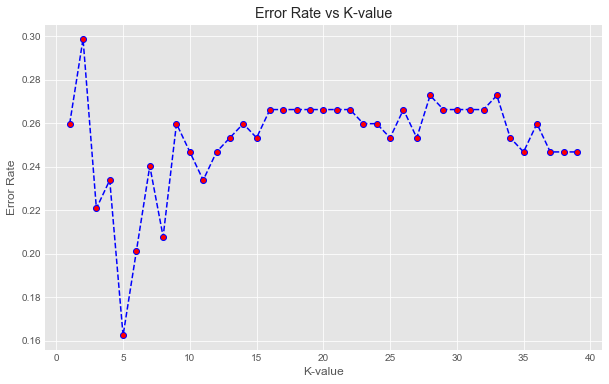

In [84]:
# TO predict k value
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value');plt.show()

In [85]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test,y_test)

0.8376623376623377

In [86]:
from sklearn.metrics import confusion_matrix
y_pred=model_KNN.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[53  9]
 [16 76]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        62
           1       0.89      0.83      0.86        92

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.84      0.84      0.84       154



In [87]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(shuffle=True,n_splits=11, random_state=1)
results = cross_validate(estimator=model_KNN,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.017719
score_time         0.041852
test_accuracy      0.802823
train_accuracy     0.873368
test_precision     0.800602
train_precision    0.863575
test_recall        0.819786
train_recall       0.886947
test_f1_score      0.807442
train_f1_score     0.875075
dtype: float64

# SVM

In [88]:
from sklearn.svm import SVC

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=30)

In [90]:
#Grid Search CV for tunning hyper parameters
clf = SVC()  
param_grid = [{'kernel':['rbf','poly','sigmoid'],'gamma':[15,5,0.5,0.005,0.0005,0.00005],'C':[0.2,1,0.5,0.1,0.001,0.2] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_ )

{'C': 0.2, 'gamma': 15, 'kernel': 'poly'}
0.8156266525647805


In [91]:
model_SVC=SVC(C=0.7,kernel='poly',gamma=16)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_test,y_test)

0.8376623376623377

In [92]:
from sklearn.metrics import confusion_matrix
y_pred=model_SVC.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[62 14]
 [11 67]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        76
           1       0.83      0.86      0.84        78

    accuracy                           0.84       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.84      0.84      0.84       154



In [93]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_SVC,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           12.750450
score_time          0.018338
test_accuracy       0.804210
train_accuracy      0.956429
test_precision      0.813342
train_precision     0.951679
test_recall         0.792538
train_recall        0.961795
test_f1_score       0.801842
train_f1_score      0.956652
dtype: float64

# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.17,random_state=71)

In [96]:
# Using Gaussian Naive Bayes
model_NB=GaussianNB()
model_NB.fit(X_train, y_train)
model_NB.score(X_test,y_test)

0.7786259541984732

In [97]:
from sklearn.metrics import confusion_matrix
y_pred=model_NB.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[42 24]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.74        66
           1       0.71      0.92      0.81        65

    accuracy                           0.78       131
   macro avg       0.80      0.78      0.77       131
weighted avg       0.80      0.78      0.77       131



In [98]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_NB,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.016474
score_time         0.026328
test_accuracy      0.737635
train_accuracy     0.750491
test_precision     0.674283
train_precision    0.682274
test_recall        0.920035
train_recall       0.937663
test_f1_score      0.777807
train_f1_score     0.789809
dtype: float64

# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,random_state=55,test_size=0.2)

In [101]:
model_RF=RandomForestClassifier(n_estimators=120,criterion='entropy',random_state=50,max_depth=7)
model_RF.fit(X_train, y_train)
model_RF.score(X_test,y_test)

0.8051948051948052

In [102]:
from sklearn.metrics import confusion_matrix
y_pred=model_RF.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[47 25]
 [ 5 77]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.76        72
           1       0.75      0.94      0.84        82

    accuracy                           0.81       154
   macro avg       0.83      0.80      0.80       154
weighted avg       0.82      0.81      0.80       154



In [103]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_RF,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.940747
score_time         0.058574
test_accuracy      0.801611
train_accuracy     0.878590
test_precision     0.743575
train_precision    0.812534
test_recall        0.928077
train_recall       0.984621
test_f1_score      0.824787
train_f1_score     0.890293
dtype: float64

# Extra Tree Classifier

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=40)

In [106]:
#Grid Search CV for tunning hyper parameters
clf = ExtraTreesClassifier()
param_grid = [{'criterion' :["entropy"], 'n_estimators':[50,80,100,120,150,170], 'max_features':["auto", "sqrt", "log2"]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_ )

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.8449233209941831


In [107]:
model_ETC=ExtraTreesClassifier(criterion='entropy',max_features='sqrt',random_state=1,n_estimators=90,max_depth=8)
model_ETC.fit(X_train, y_train)
model_ETC.score(X_test,y_test)

0.7987012987012987

In [108]:
from sklearn.metrics import confusion_matrix
y_pred=model_ETC.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[53 17]
 [14 70]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        70
           1       0.80      0.83      0.82        84

    accuracy                           0.80       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.80      0.80      0.80       154



In [109]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_ETC,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.559627
score_time         0.064894
test_accuracy      0.805487
train_accuracy     0.887241
test_precision     0.765935
train_precision    0.837869
test_recall        0.886132
train_recall       0.960814
test_f1_score      0.820847
train_f1_score     0.894968
dtype: float64

# XGBM

In [110]:
from xgboost import XGBClassifier

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=66)

In [112]:
#Grid Search CV for tunning hyper parameters
clf = XGBClassifier()  
param_grid = [{'gamma':[15,5,0.5,0.005,0.0005,0.00005],'learning_rate':[0.05,0.1,0.15,0.2],'n_estimators':[100,300,500,700,900],'eval_metric':['mlogloss'] }]
gsv = GridSearchCV(clf,param_grid,cv=6)
gsv.fit(X_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_ )

{'eval_metric': 'mlogloss', 'gamma': 5e-05, 'learning_rate': 0.15, 'n_estimators': 100}
0.8006535947712418


In [113]:
model_XGB=XGBClassifier(learning_rate =0.005, n_estimators=96,eval_metric='mlogloss',max_depth=8)
model_XGB.fit(X_train, y_train)
model_XGB.score(X_test,y_test)

0.7922077922077922

In [114]:
from sklearn.metrics import confusion_matrix
y_pred=model_XGB.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[53 17]
 [15 69]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        70
           1       0.80      0.82      0.81        84

    accuracy                           0.79       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.79      0.79      0.79       154



In [160]:
kfold = KFold(shuffle=True, n_splits=11,random_state=30)
results = cross_validate(estimator=model_XGB,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.512800
score_time         0.020913
test_accuracy      0.786034
train_accuracy     0.851564
test_precision     0.738604
train_precision    0.797102
test_recall        0.895833
train_recall       0.943820
test_f1_score      0.807961
train_f1_score     0.864167
dtype: float64

# Ensemble Models

In [116]:
#create the ensemble model
from sklearn.ensemble import VotingClassifier     #Heterogenious

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=80)

In [118]:
#create the submodels
estimators=[]
estimators.append(('KNN', model_KNN))
estimators.append(('SVM',model_SVC))
estimators.append(('ETC',model_ETC))
estimators.append(('XGB',model_XGB))

In [119]:
combine_model=VotingClassifier(estimators)
combine_model.fit(X_train, y_train)
combine_model.score(X_test,y_test)

0.8506493506493507

In [126]:
from sklearn.metrics import confusion_matrix
y_pred=combine_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[61 13]
 [10 70]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        74
           1       0.84      0.88      0.86        80

    accuracy                           0.85       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.85      0.85      0.85       154



In [161]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=combine_model,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           10.984772
score_time          0.092692
test_accuracy       0.818574
train_accuracy      0.930484
test_precision      0.820140
train_precision     0.923064
test_recall         0.823255
train_recall        0.939276
test_f1_score       0.819930
train_f1_score      0.931047
dtype: float64

In [128]:
#
from sklearn.metrics import confusion_matrix
Y_PRED = combine_model.predict(X_res)
confusion_matrix=confusion_matrix(Y_res,Y_PRED)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(Y_res,Y_PRED)
print(classification_report)

[[347  36]
 [ 31 352]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       383
           1       0.91      0.92      0.91       383

    accuracy                           0.91       766
   macro avg       0.91      0.91      0.91       766
weighted avg       0.91      0.91      0.91       766



# Work on test Data

In [129]:
# importing test file
loan_test = pd.read_csv('test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [130]:
loan_test.shape

(367, 12)

In [131]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [132]:
loan_test.nunique().sort_values(ascending=False)

Loan_ID              367
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Dependents             4
Property_Area          3
Credit_History         2
Self_Employed          2
Education              2
Married                2
Gender                 2
dtype: int64

In [133]:
# change the data type of Credit_History column
loan_test['Credit_History'] = loan_test['Credit_History'].astype('O')

In [134]:
loan_test.dtypes.value_counts()

object     8
float64    2
int64      2
dtype: int64

In [135]:
# describe the chategoric columns
loan_test.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,367,356,367,357,367,344,338.0,367
unique,367,2,2,4,2,2,2.0,3
top,LP001208,Male,Yes,0,Graduate,No,1.0,Urban
freq,1,286,233,200,283,307,279.0,140


In [136]:
# First we split numeric and chategoric columns seperately
cat_data_t = []
num_data_t = []
for col,types in enumerate(loan_test.dtypes):
    if types=='object':
        cat_data_t.append(loan_test.iloc[:,col])
    else:
        num_data_t.append(loan_test.iloc[:,col])

cat_data_t = pd.DataFrame(cat_data_t).T
num_data_t= pd.DataFrame(num_data_t).T

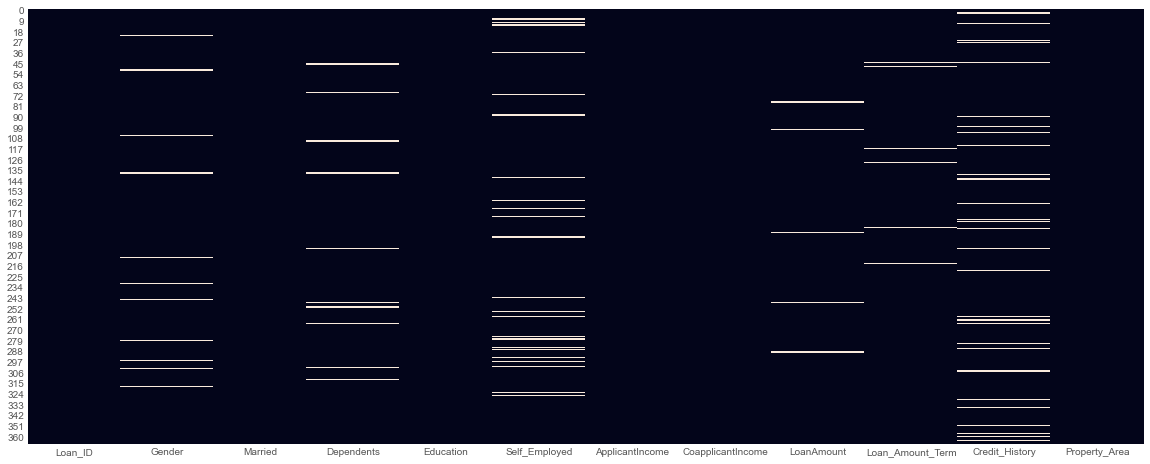

In [137]:
# visualize using Heat map
plt.figure(figsize=(20,8))
sns.heatmap(loan_test.isnull(), cbar=False);plt.show()

In [138]:
#Checking the null Values in Data
loan_test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [139]:
cat_data_t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,1,Urban


In [140]:
#missing value imputation for categorical variable using mode
cat_data_t.fillna(cat_data_t.mode().iloc[0], inplace=True)
cat_data_t.isnull().sum().any() # no more missing data 

False

In [141]:
num_data_t.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720.0,0.0,110.0,360.0
1,3076.0,1500.0,126.0,360.0
2,5000.0,1800.0,208.0,360.0
3,2340.0,2546.0,100.0,360.0
4,3276.0,0.0,78.0,360.0


In [142]:
#missing value imputation for numeric variable using backfill (use next valid observation to fill gap)
num_data_t.fillna(method='bfill', inplace=True)
num_data_t.isnull().sum().any() #no more missing data

False

In [143]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome on train data
num_data_t['TotalIncome'] = num_data_t['ApplicantIncome'] + num_data_t['CoapplicantIncome']

In [144]:
num_data_t.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [145]:
num_data_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,110.0,360.0,5720.0
1,126.0,360.0,4576.0
2,208.0,360.0,6800.0
3,100.0,360.0,4886.0
4,78.0,360.0,3276.0


In [146]:
cat_data_t.drop(columns={'Loan_ID'}, axis=1, inplace=True)

In [147]:
cat_data_t['Gender'].replace({'Male':1,'Female':0},inplace=True)
cat_data_t['Married'].replace({'Yes':1,'No':0},inplace=True)
cat_data_t['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
cat_data_t['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [148]:
cat_data_t['Credit_History'] = cat_data_t['Credit_History'].astype('int64')

In [149]:
# transform other columns
cat_data_t = pd.get_dummies(cat_data_t)
cat_data_t.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,1,0,0,0,0,1
2,1,1,1,0,1,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,0,1


In [150]:
# ## variable transformation

# plt.figure(figsize=(20,15))
# plt.subplot(321);sns.distplot(num_data_t['LoanAmount']);      plt.subplot(322);sns.distplot(np.log(np.cbrt(num_data_t["LoanAmount"]+1)))
# plt.subplot(323);sns.distplot(num_data_t['Loan_Amount_Term']);plt.subplot(324);sns.distplot(np.log(np.log(num_data_t['Loan_Amount_Term'])))
# plt.subplot(325);sns.distplot(num_data_t['TotalIncome']);     plt.subplot(326);sns.distplot(np.log(np.log(num_data_t["TotalIncome"]+1)));plt.show()

In [151]:
num_data_trans_t = pd.DataFrame()   
num_data_trans_t['LoanAmount'] =np.log(np.cbrt(num_data_t["LoanAmount"]+1))
num_data_trans_t['Loan_Amount_Term']=np.log(np.log(num_data_t['Loan_Amount_Term']))
num_data_trans_t['TotalIncome'] =np.log(np.log(num_data_t["TotalIncome"]+1))

num_data_trans_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,1.569843,1.772594,2.157779
1,1.614729,1.772594,2.131654
2,1.780778,1.772594,2.177569
3,1.538374,1.772594,2.139399
4,1.456483,1.772594,2.091208


In [152]:
### Normalizaiton of data
num_scale_t = pd.DataFrame(scale.fit_transform(num_data_trans_t),columns=num_data_trans_t.columns)
num_scale_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,0.455854,0.961428,0.362552
1,0.501587,0.961428,0.297855
2,0.670769,0.961428,0.411562
3,0.423790,0.961428,0.317036
4,0.340354,0.961428,0.197688


In [153]:
final_loan_test = pd.concat([cat_data_t, num_scale_t], axis=1)
final_loan_test.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,1,1,1,0,1,1,0,0,0,0,0,1,0.455854,0.961428,0.362552
1,1,1,1,0,1,0,1,0,0,0,0,1,0.501587,0.961428,0.297855
2,1,1,1,0,1,0,0,1,0,0,0,1,0.670769,0.961428,0.411562
3,1,1,1,0,1,0,0,1,0,0,0,1,0.423790,0.961428,0.317036
4,1,0,0,0,1,1,0,0,0,0,0,1,0.340354,0.961428,0.197688


In [154]:
final_loan_test.shape

(367, 15)

In [155]:
combine_model.fit(X_res, Y_res)
predicted_values=combine_model.predict(final_loan_test)

In [156]:
predicted_loan_status=pd.DataFrame(predicted_values,columns=['Predicted_Loan_status'])

In [157]:
final_prediction = pd.concat([loan_test['Loan_ID'],predicted_loan_status],axis=1)
final_prediction

,Loan_ID,Predicted_Loan_status
0,LP001015,1
1,LP001022,0
2,LP001031,0
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,1
364,LP002980,1
365,LP002986,1
